In [3]:
from numpy.random import seed
seed(42)
import tensorflow as tf
tf.random.set_seed(42)

import numpy as np 
import pandas as pd
import os

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import cv2
import os

In [ ]:
INIT_LR = 0.001
EPOCHS = 26
BS = 8

In [ ]:

print("[INFO] loading images...")
imagePaths = list(paths.list_images("data"))
data = []
labels = []


for imagePath in imagePaths:

    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (240, 240))

    data.append(image)
    labels.append(label)
    
data = np.array(data) / 255.0
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [ ]:
trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")

In [ ]:
baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(240, 240, 3)))

In [ ]:
from keras import models
from keras import layers
from keras.applications import VGG16
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
conv_base = VGG16(weights='imagenet',
 include_top=False,
 input_shape=(240, 240, 3))
conv_base.trainable = False
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
 
 optimizer=optimizers.Adam(lr=0.001),
 metrics=['acc'])

In [ ]:
for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
# print("[INFO] compiling model...")
# opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# model.compile(loss="mean_squared_error", optimizer=opt, metrics=["accuracy"])
# print(model.summary())

In [ ]:
print("[INFO] training head...")
H = model.fit_generator(
    trainAug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

In [ ]:
predIdxs = model.predict(testX, batch_size=BS)

In [ ]:
predIdxs = np.argmax(predIdxs, axis=1)

In [ ]:
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

In [ ]:
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

In [ ]:
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

In [ ]:
# N = EPOCHS
# plt.style.use("ggplot")
# plt.figure()
# plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
# plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
# plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
# plt.title("Training Loss and Accuracy on COVID-19 Dataset")
# plt.xlabel("Epoch #")
# plt.ylabel("Loss/Accuracy")
# plt.legend(loc="lower left")
# plt.savefig("plot.png")

In [ ]:
model.save("covid19.h5")

In [5]:
model = tf.keras.models.load_model('covid19.h5')


Using TensorFlow backend.


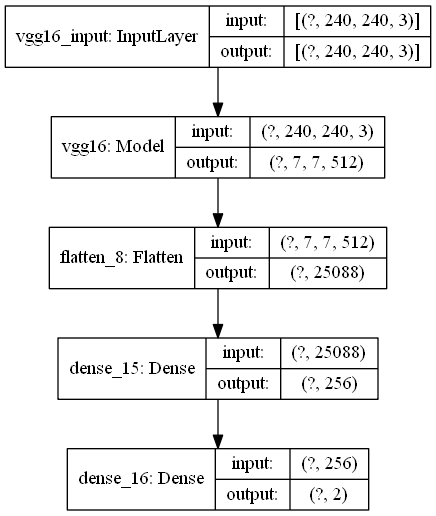

In [6]:
from keras.layers import Dense
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
# from matplotlib import pyplot as plt
# print("[INFO] loading images...")
# imagePaths = list(paths.list_images("data_val"))
# data = []
# labels = []

# print(imagePaths)
# for imagePath in imagePaths:
    
#     print(imagePaths)

#     label = imagePath.split(os.path.sep)[-2]
#     image = cv2.imread(imagePath)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image = cv2.resize(image, (240, 240))
    
#     data.append(image)
#     labels.append(label)
    
# data = np.array(data) / 255.0
# labels = np.array(labels)

# lb = LabelBinarizer()
# labels = lb.fit_transform(labels)
# labels = to_categorical(labels)

In [13]:
# predIdxs = model.predict(data)
# np.argmax(predIdxs, axis=1)